# NETW 1013 Clustering Project 

**Objective:** 
The objective of this project is to teach students how to apply clustering to real datasets.

You should be able to answer the following questions and provide reasonable justification for your answers: 
* Which clustering approach have you decided to use on each dataset? 
* Compare between Kmeans, Hierarchal and DBScan.
* Discuss how you tuned your clustering hyperparameters to achieve the best cluster assignment?
* What is the effect of different distance functions on the calculated clusters?
* How did you evaluate the performance of different clustering techniques on different datatsets?
* Visualize your output where applicable.
* What is the effect of scaling on the performance of clustering techniques? 

 
 



Running this project requires the following imports:

In [4]:
!pip install plotnine

In [5]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

%matplotlib inline
# Please refer to the sklearn documentation to learn more about the different parameters for each clustering technique.

In [6]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = ['b', 'r', 'g', 'c', 'm', 'y', 'k', 
             '#FF5733', '#33FF57', '#3357FF', '#FF33A6', '#A633FF', '#33FFF3', '#F3FF33',
             '#FFB533', '#FF3380', '#8033FF', '#33FFB5', '#FF5733', '#FF33FF']  #List colors
    alpha = 0.5  
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The dataset generated below is known to be best clustered into 6 clusters.
* Cluster the data set below using the three different clustering techniques discussed in the course.
* Visualize your clustering output in each step of your work.



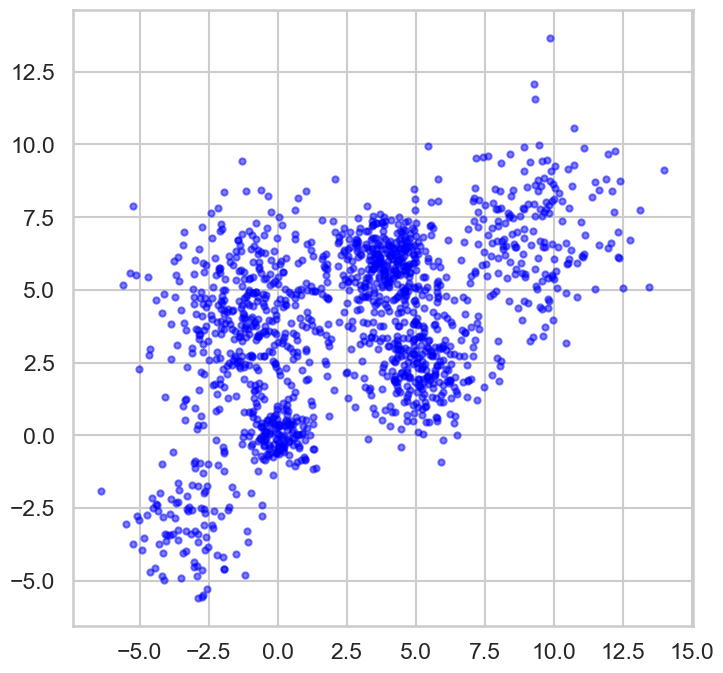

In [8]:
#Data Generation and Visualization
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

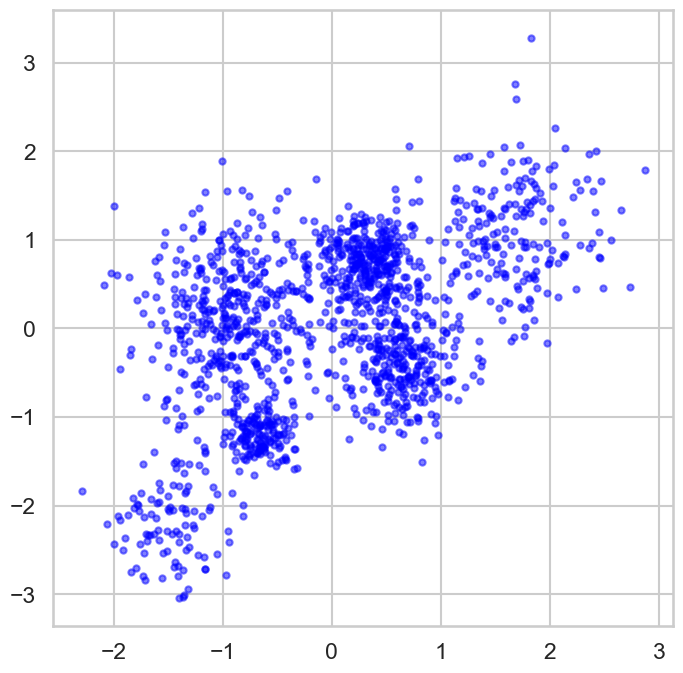

In [9]:
#I will first start by scaling the data to have a zero mean and unit variance to make them more suitable for the clustering models
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(Multi_blob_Data)

# Visualize the scaled data
display_cluster(data_scaled)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data. 
* Display the outcome of each value of K. 
* Plot distortion function versus K and choose the approriate value of K. 
* Plot the silhouette_score versus K and use it to choose the best K. 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 
* Comment on the effect of centroid initialization on cluster assignment. 
* Hint: Lookup k-means++ .

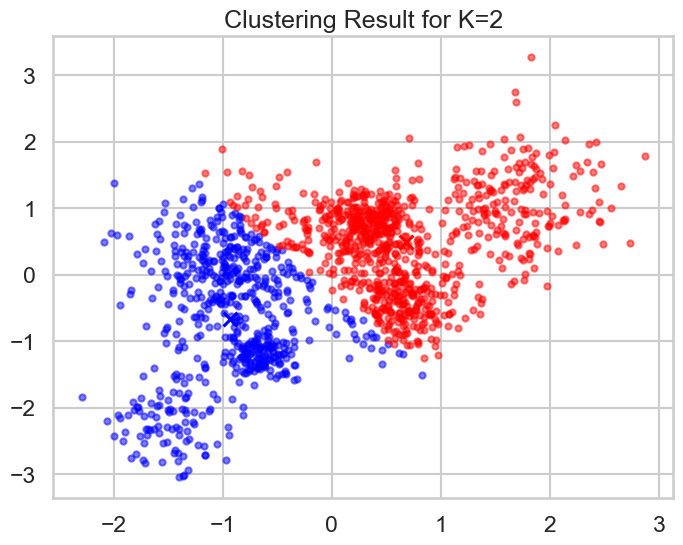

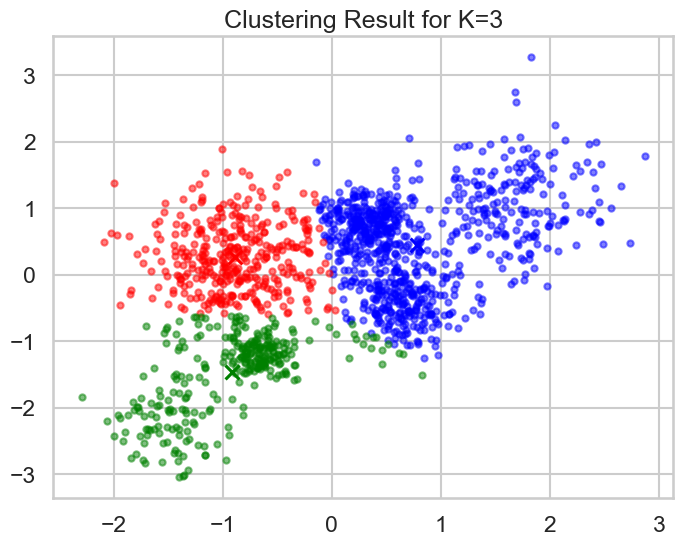

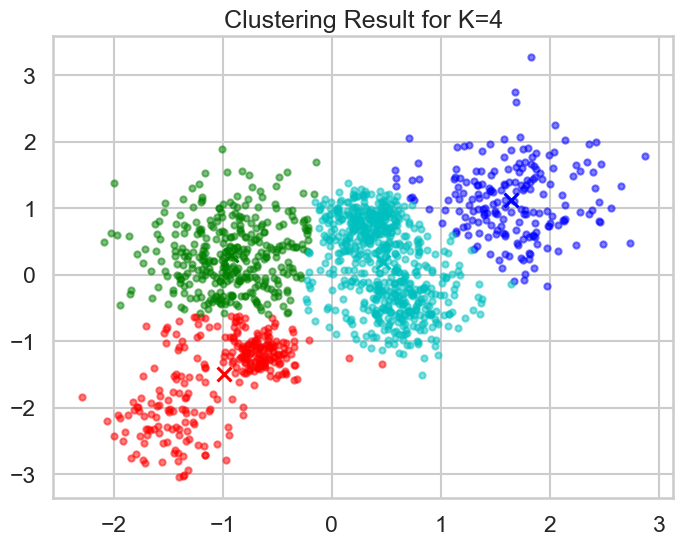

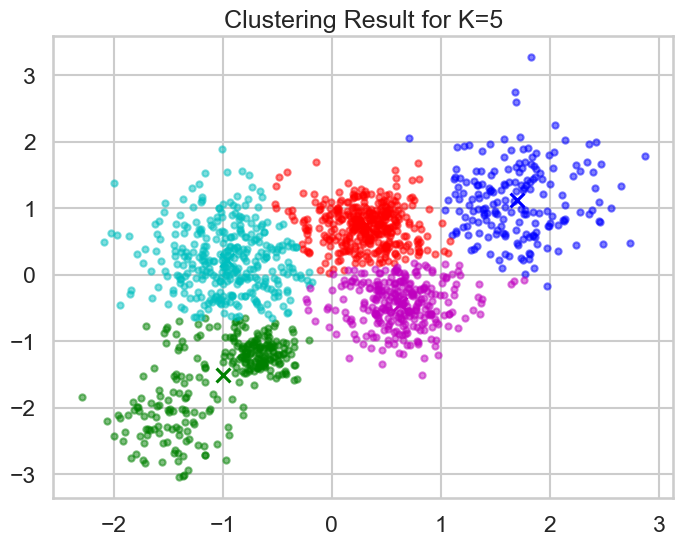

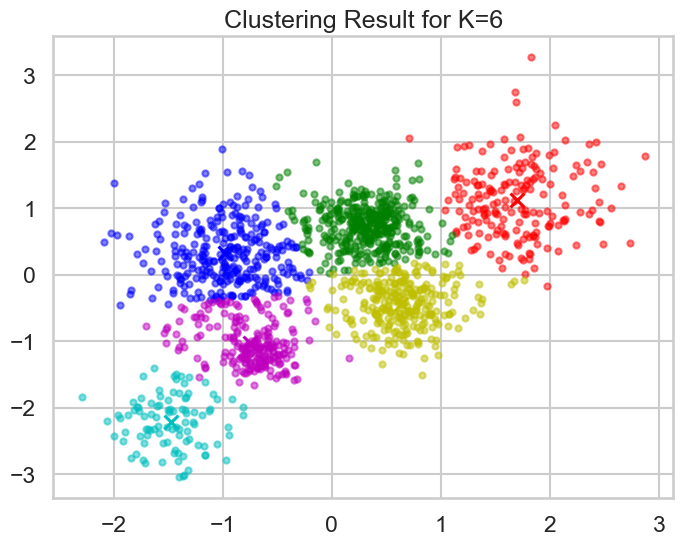

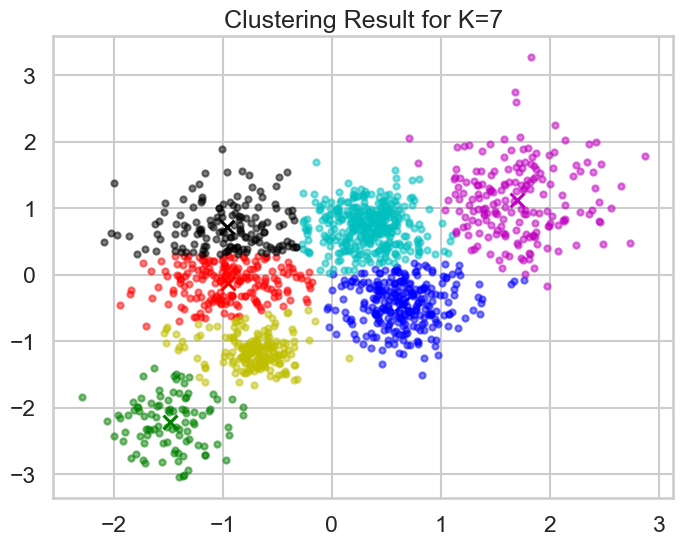

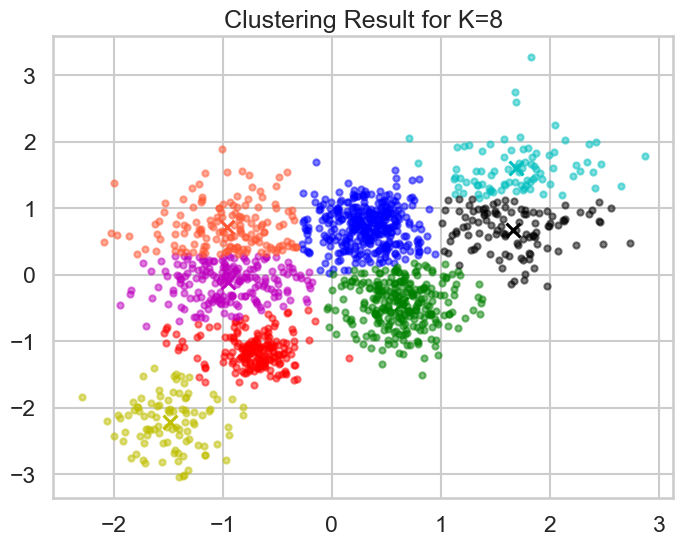

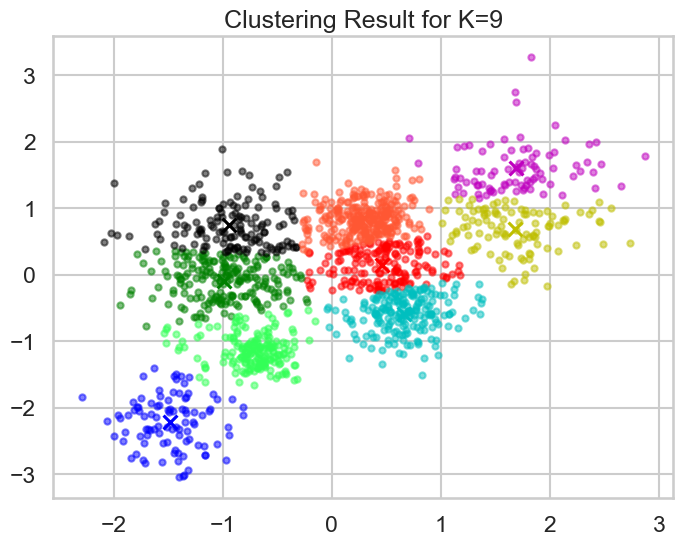

In [11]:
import numpy as np
import matplotlib.pyplot as plt

distortions = []
silhouette_scores = []
k_values=range(2, 10)

for k in k_values:
    
    model_kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42) #from documentation the default is already k-means++
    clusters = model_kmeans.fit_predict(data_scaled)
    
    # Calculate distortion (within-cluster sum of squares)
    distortions.append(model_kmeans.inertia_)
    
    # Calculate silhouette score
    score = silhouette_score(data_scaled, clusters)
    silhouette_scores.append(score)
    #plot output of each step
    plt.figure(figsize=(8, 6))
    display_cluster(data_scaled, km=model_kmeans, num_clusters=k)
    plt.title(f'Clustering Result for K={k}')
    plt.show()

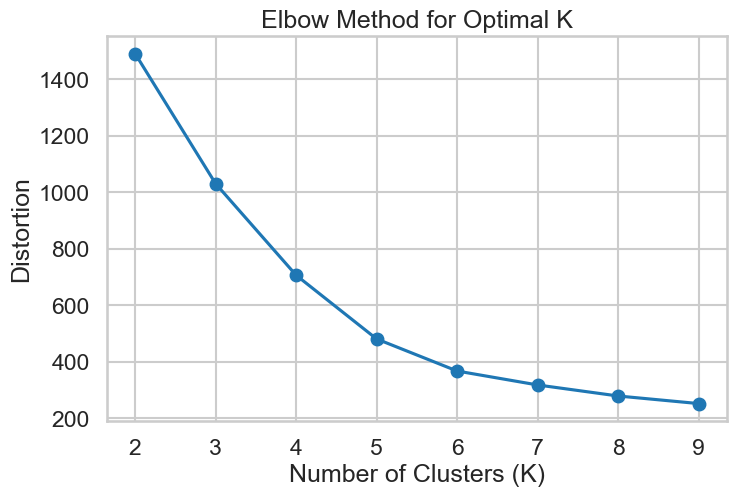

In [12]:
# Plot distortion vs K
plt.figure(figsize=(8, 5))
plt.plot(k_values, distortions, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K')
plt.show()

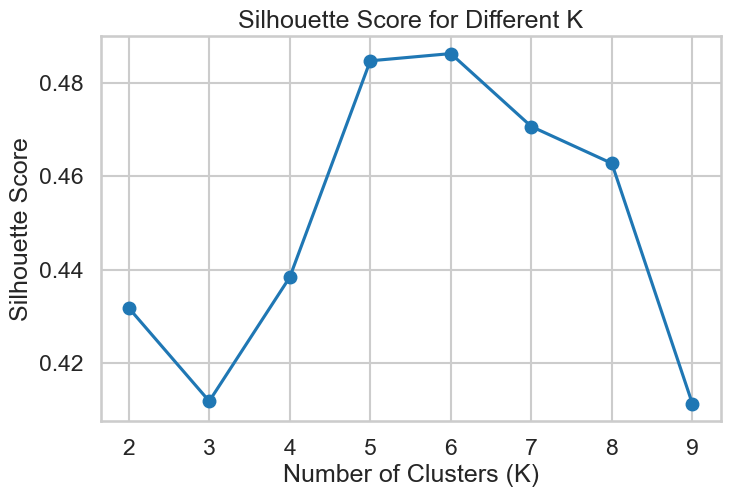

In [13]:
# Plot silhouette score vs K
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K')
plt.show()

From the first graph of the elbow method we see that the distortion level starts to stabilize/flattern arounf K=6 and onwards this gives us an initial guess that the optimal number clusters is between 5-7.
Using the plot for the silhouette score we see that using K=6 provides the highest silhouette score and can therefore be chosen as the best number of clusters to use for this data set using the K-Means algorithm.

In [15]:
best_k = k_values[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)

print(f'Best K based on Silhouette Score: {best_k}')
print(f'Highest Silhouette Score: {best_score}')


Best K based on Silhouette Score: 6
Highest Silhouette Score: 0.4862522276594507


### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data.
* In the  AgglomerativeClustering change the following parameters:
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage(try different options)
    * Distance_threshold (try different options)
* Plot the dendrograph for one trial.
* For each of these trials, calculate the silhouette_score and display the resulting clusters.  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation.

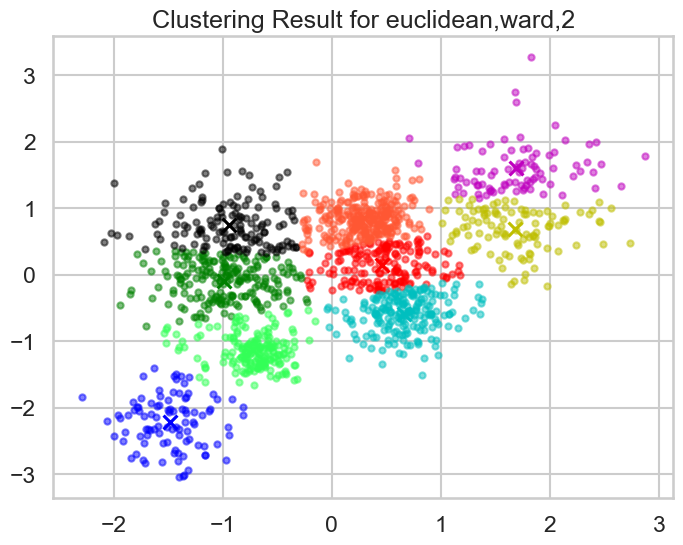

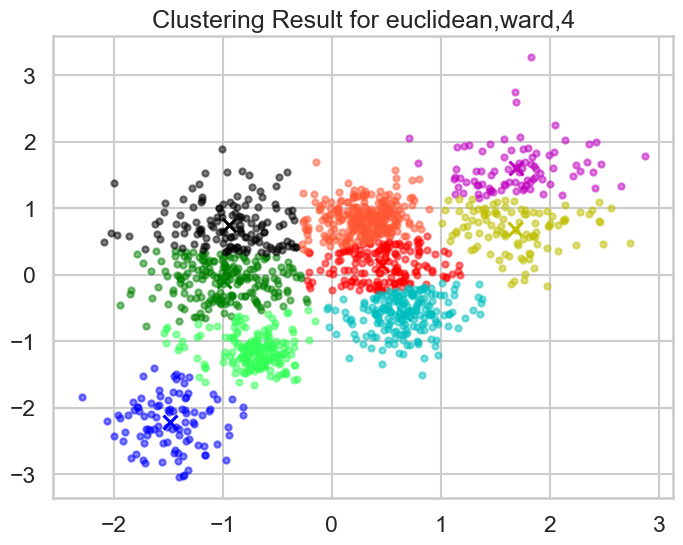

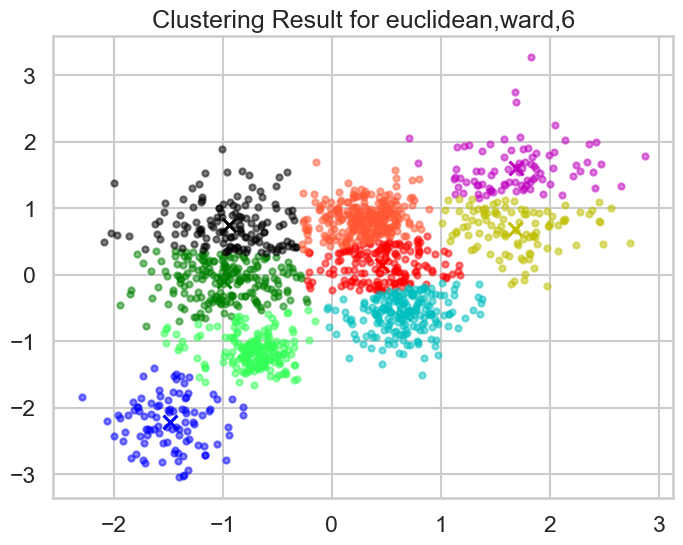

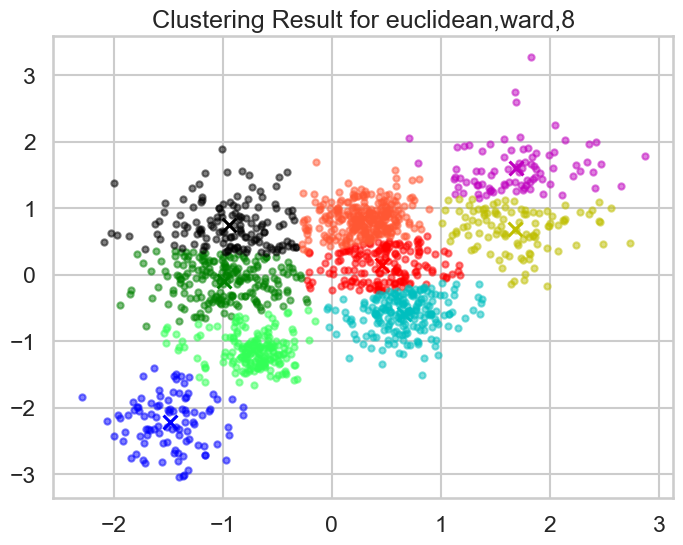

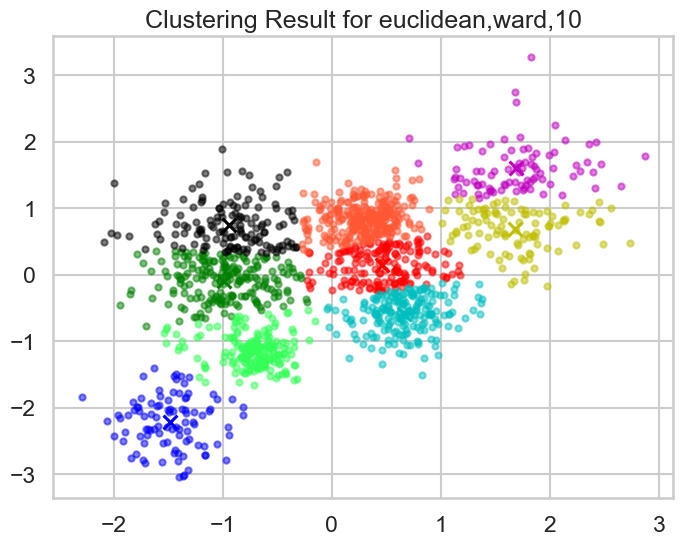

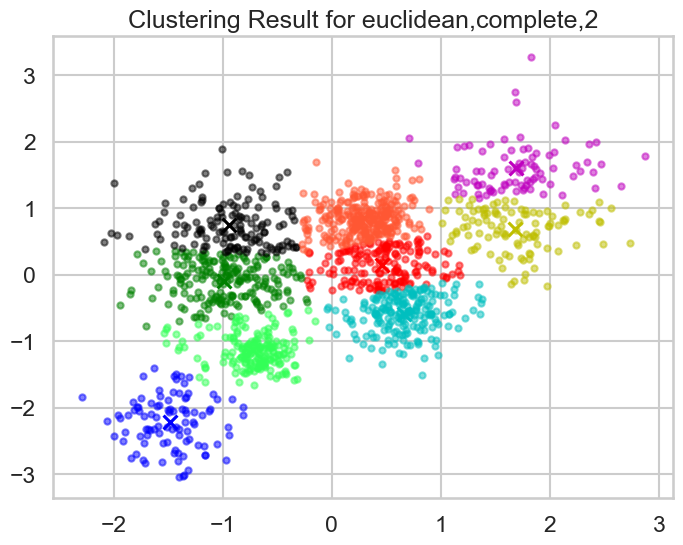

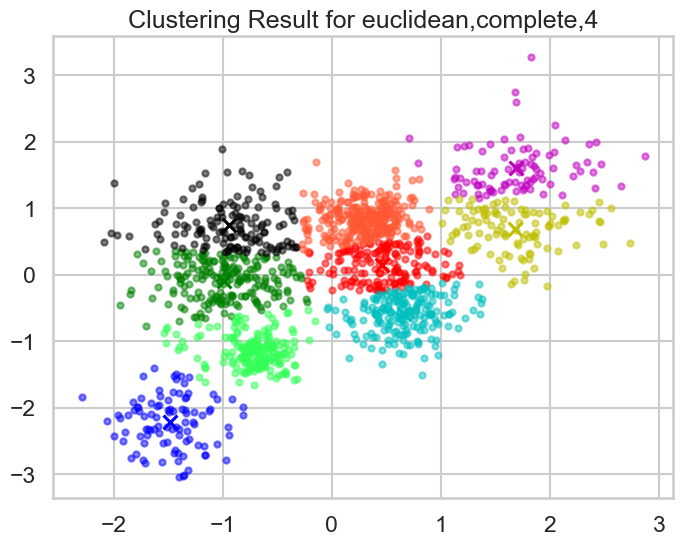

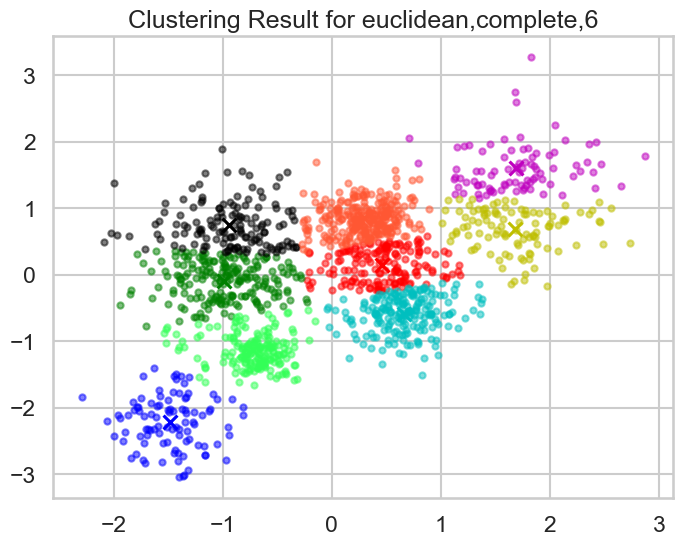

Skipping euclidean, complete, Threshold=8 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipping euclidean, complete, Threshold=10 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)


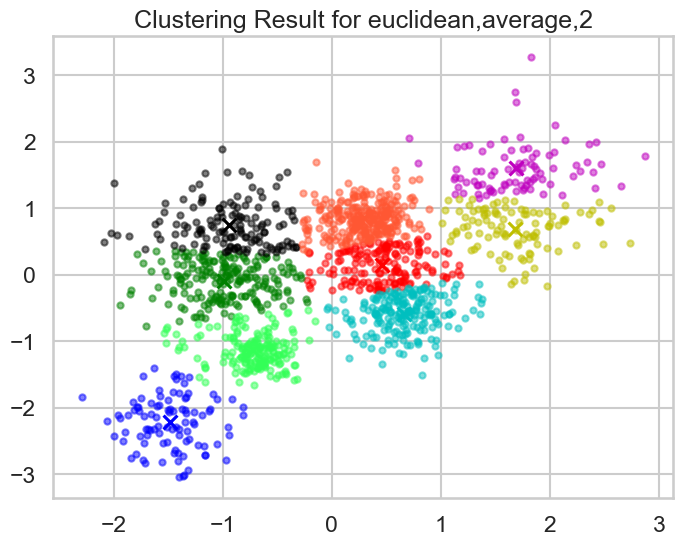

Skipping euclidean, average, Threshold=4 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipping euclidean, average, Threshold=6 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipping euclidean, average, Threshold=8 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipping euclidean, average, Threshold=10 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipping euclidean, single, Threshold=2 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipping euclidean, single, Threshold=4 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipping euclidean, single, Threshold=6 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipping euclidean, single, Threshold=8 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclus

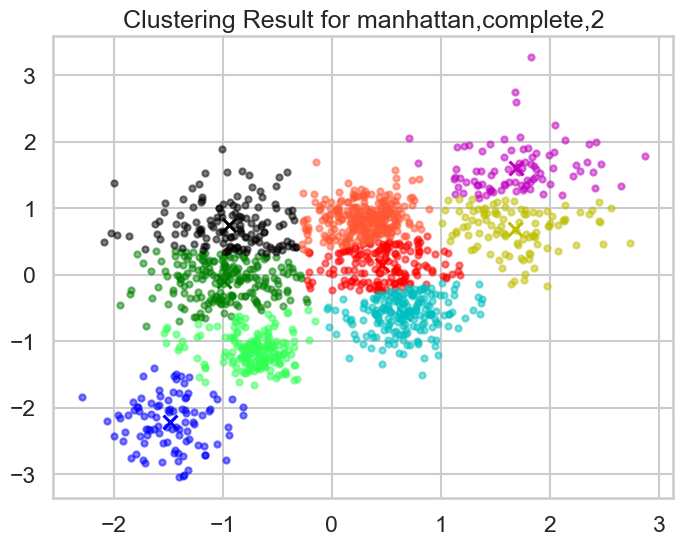

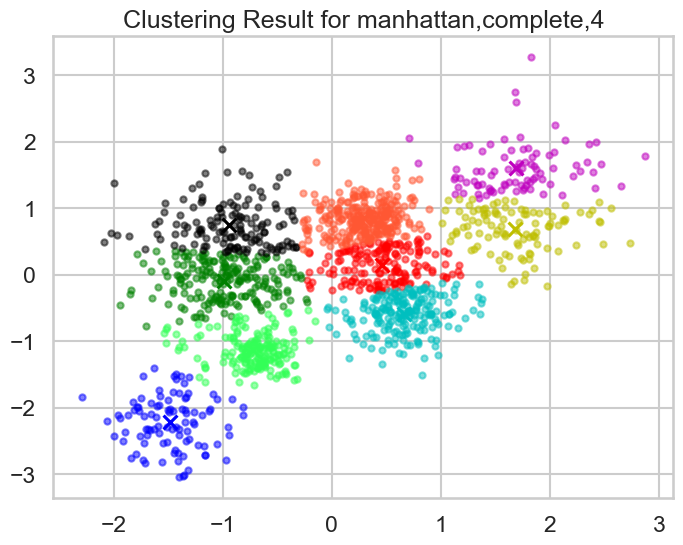

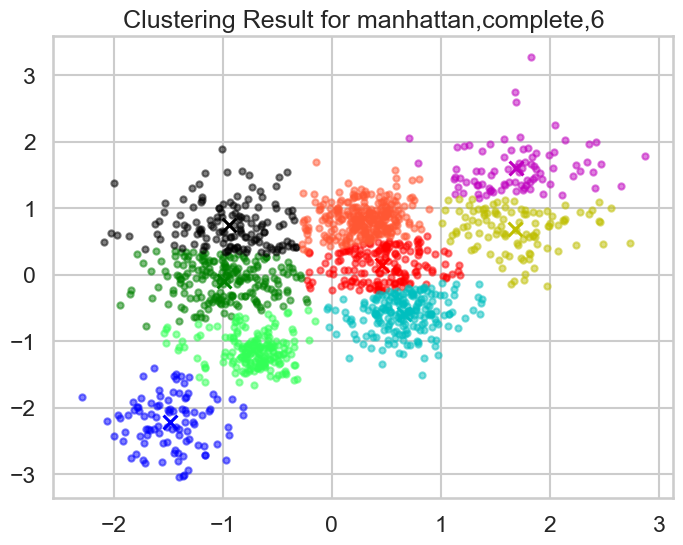

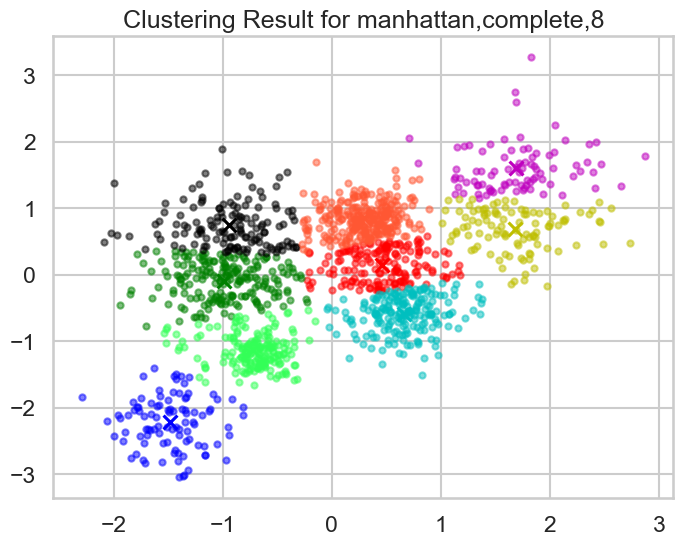

Skipping manhattan, complete, Threshold=10 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)


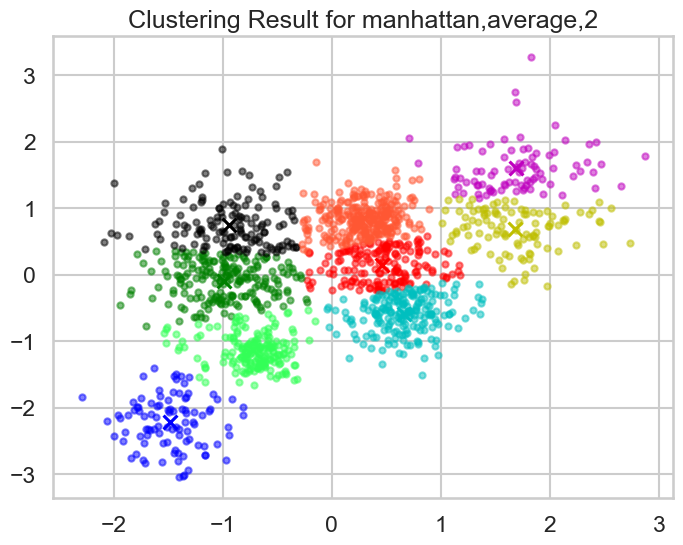

Skipping manhattan, average, Threshold=4 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipping manhattan, average, Threshold=6 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipping manhattan, average, Threshold=8 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipping manhattan, average, Threshold=10 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipping manhattan, single, Threshold=2 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipping manhattan, single, Threshold=4 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipping manhattan, single, Threshold=6 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipping manhattan, single, Threshold=8 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclus

In [17]:
from sklearn.cluster import AgglomerativeClustering

affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['ward', 'complete', 'average', 'single']
distance_thresholds = [2,4,6,8,10]

best_agglomerative_score = -1
best_params = {}

for affinity in affinities:
    for linkage in linkages:
        for threshold in distance_thresholds:
            try:
                model_agg = AgglomerativeClustering(n_clusters=None, metric=affinity, linkage=linkage, distance_threshold=threshold)
                clusters = model_agg.fit_predict(data_scaled)
                score = silhouette_score(data_scaled, clusters)
                plt.figure(figsize=(8, 6))
                display_cluster(data_scaled, km=model_kmeans, num_clusters=k)
                plt.title(f'Clustering Result for {affinity},{linkage},{threshold}')
                plt.show()
                
                if score > best_agglomerative_score:
                    best_agglomerative_score = score
                    best_params = { 'affinity': affinity, 'linkage': linkage, 'threshold': threshold }
            except Exception as e:
                 print(f"Skipping {affinity}, {linkage}, Threshold={threshold} due to error: {e}")


In [18]:
print(f'Best Agglomerative Clustering Params: {best_params}')
print(f'Best Agglomerative Silhouette Score: {best_agglomerative_score}')

Best Agglomerative Clustering Params: {'affinity': 'euclidean', 'linkage': 'ward', 'threshold': 10}
Best Agglomerative Silhouette Score: 0.4548664117944667


In [19]:
clustering = AgglomerativeClustering(
    n_clusters=None,
    metric=best_params['affinity'],  # Use affinity if not using 'ward' linkage
    linkage=best_params['linkage'],
    distance_threshold=best_params['threshold']
)
clusters = clustering.fit_predict(data_scaled)

# Count the unique cluster labels
num_clusters = len(set(clusters) - {-1})

print(f'Number of clusters formed: {num_clusters}')

Number of clusters formed: 7


Here we can see that the AgglomerativeClustering works best with the following combination of parameters {'affinity': 'euclidean', 'linkage': 'ward', 'threshold': 10} to achieve a silhouette score of 0.4548664117944667. This combination of parameters clusters the data into 7 clusters as shown. The Agglomerative Clustering algorithm achieves a close enough score to the K-Means however, the K_means still outperforms it in terms of silhouette score.

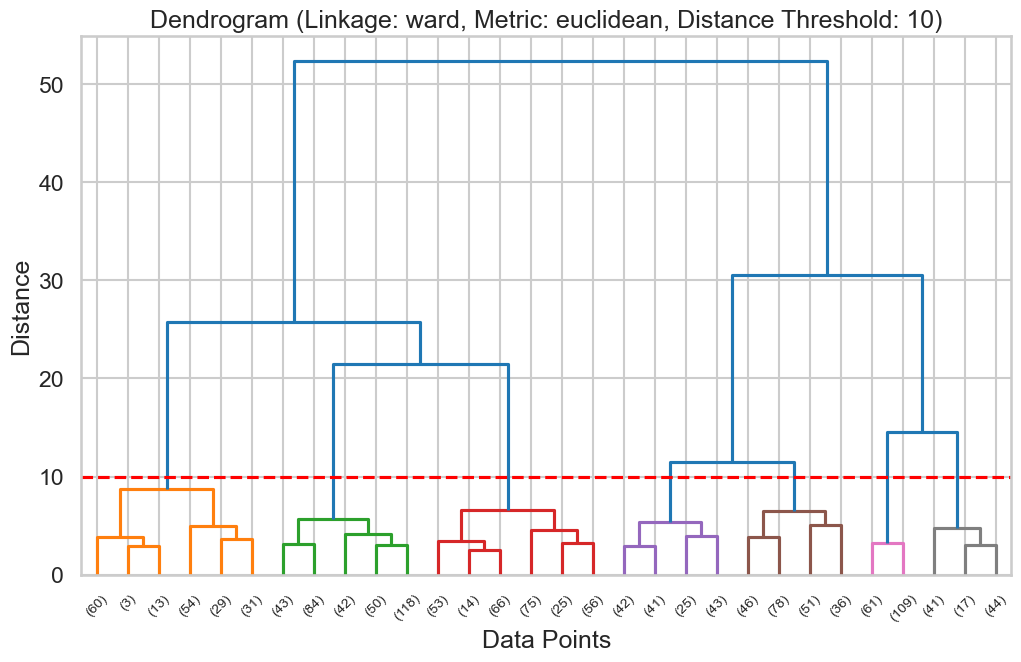

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Plot dendrogram for the best model
Z = linkage(data_scaled, method=best_params['linkage'], metric=best_params['affinity'])

plt.figure(figsize=(12, 7))
plt.title(f"Dendrogram (Linkage: {best_params['linkage']}, Metric: {best_params['affinity']}, Distance Threshold: {best_params['threshold']})")
plt.xlabel("Data Points")
plt.ylabel("Distance")

# Plot dendrogram with color threshold

dendrogram(Z, color_threshold=best_params['threshold'], truncate_mode='lastp')
plt.axhline(y=best_params['threshold'], color='red', linestyle='--')

plt.show()



### DBScan
* Use DBScan function to  to cluster the above data. 
* In the  DBscan change the following parameters: 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
    * Another option: Lookup K-Distance graph method
* Plot the silhouette_score versus the variation in the EPS and the min_samples.
* Plot the resulting Clusters in this case. 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments. 

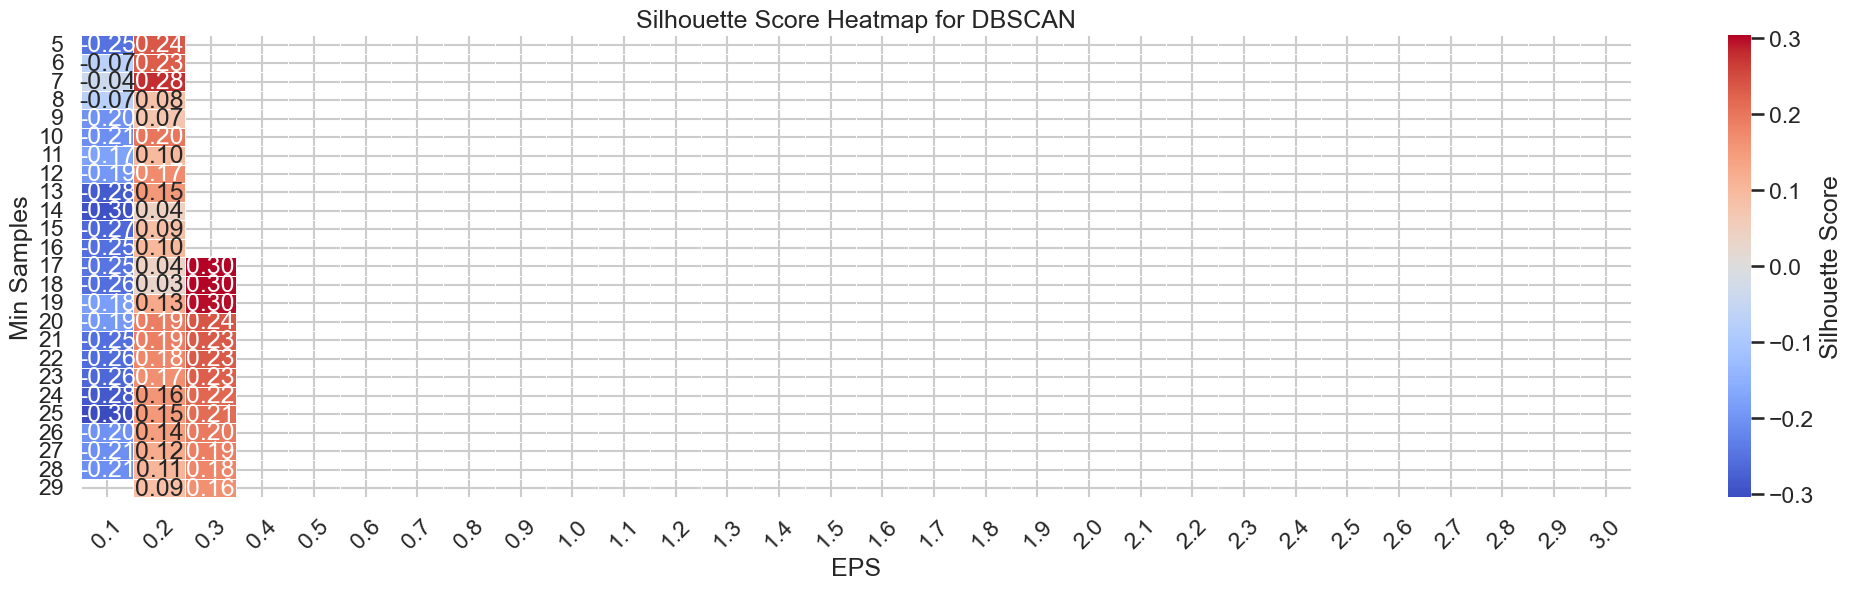


Best Parameters:
EPS: 0.300, Min Samples: 18, Clusters: 2
Best Silhouette Score: 0.3038


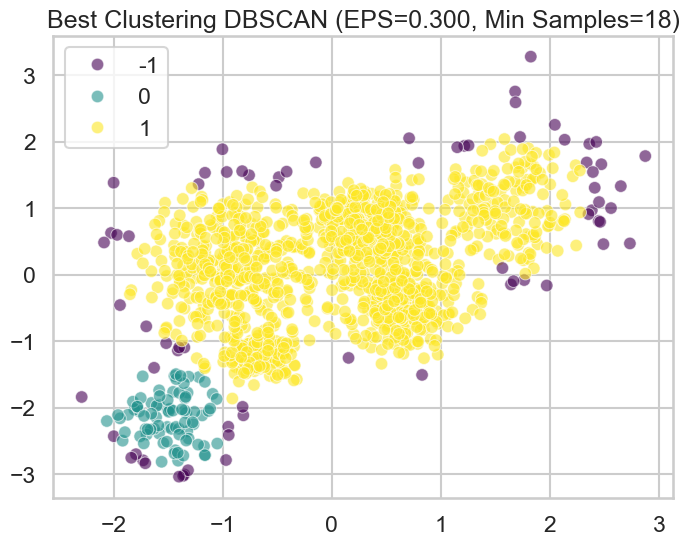

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product

# Define parameter ranges
eps_values = np.linspace(0.1, 3, 30)  # Reduce number of steps for clarity
min_samples_values = range(5, 30, 1)  # More range for Min Samples

# Store results
results = []
best_score = -1
best_params = None

# Iterate over eps and min_samples
for eps, min_samples in product(eps_values, min_samples_values):
    model = DBSCAN(eps=eps, min_samples=min_samples)
    labels = model.fit_predict(data_scaled)

    # Get number of clusters (excluding noise)
    n_clusters = len(set(labels) - {-1})

    # Ignore cases with only 1 cluster or no clusters
    if n_clusters > 1:
        score = silhouette_score(data_scaled, labels)
        results.append((eps, min_samples, score, n_clusters))

        # Update best score
        if score > best_score:
            best_score = score
            best_params = (eps, min_samples, n_clusters)
# Convert results to a NumPy array
results = np.array(results, dtype=object)

# Create a pivot table for heatmap
heatmap_data = np.full((len(min_samples_values), len(eps_values)), np.nan)

for i, min_samples in enumerate(min_samples_values):
    for j, eps in enumerate(eps_values):
        match = results[(results[:, 0] == eps) & (results[:, 1] == min_samples)]
        if len(match) > 0:
            heatmap_data[i, j] = match[0, 2]  # Silhouette score

# Plot the heatmap
plt.figure(figsize=(25, 6))
ax = sns.heatmap(heatmap_data, xticklabels=np.round(eps_values, 3),
                 yticklabels=min_samples_values, cmap="coolwarm", annot=True,
                 fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Silhouette Score'})

plt.xlabel("EPS")
plt.ylabel("Min Samples")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.title("Silhouette Score Heatmap for DBSCAN")
plt.show()

# Print Best Parameters
print("\nBest Parameters:")
print(f"EPS: {best_params[0]:.3f}, Min Samples: {best_params[1]}, Clusters: {best_params[2]}")
print(f"Best Silhouette Score: {best_score:.4f}")

# Plot best clustering result
best_eps, best_min_samples, _ = best_params
best_model = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_labels = best_model.fit_predict(data_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=best_labels, palette='viridis', alpha=0.6)
#plt.scatter(best_model.components_[:, 0], best_model.components_[:, 1], c='red', marker='x', s=100, label='Core Points')
plt.title(f"Best Clustering DBSCAN (EPS={best_eps:.3f}, Min Samples={best_min_samples})")
plt.legend()
plt.show()

The DBSCAN identifies 2 clusters and produces a Silhouette Score of 0.3038. It also identifies some of the points as noise and not being related to the dataset - which is one of the strengths of DBSCAN. Even though the Silhouette score is not bad, it is considered suboptimal compared to the K-means algorithm.It seperates dense regions from each other however it doesn't give the most granular results since DBSCAN works better with datasets that have varying densities or irregularly shaped clusters  but this dataset was too uniform for it to work well.

K-means assumes spherical, equally sized clusters, so since the data aligns well with that assumption, it often achieves higher Silhouette scores as found


DBSCAN, on the other hand, excels in arbitrary-shaped clusters and noisy data but can underperform are tightly packed like in our case here

Agglomerative Clusteringt also isn't as well-suited for evenly sized, well-separated clusters, making it less effective her
e.#### Therefore, K-Means is considered to be the best clustering method for this dataset due to the shape of the data a since it achieves the highest scores


## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers. 

The data represents three classes. 


In [26]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

In [27]:
iris = load_iris()
data = iris.data  # Extract features
# Scale the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

* Repeat all the above clustering approaches and steps on the above data. 
* Comment on the effect of scaling on clustering this dataset. Show the difference between clustering the data with and without   scaling.
* Compare between the different clustering approaches. 
* Is your clustering outcome consistent with the labels?

## K-Means

## Without Scaling

In [31]:
import numpy as np
import matplotlib.pyplot as plt

distortions = []
silhouette_scores = []
k_values=range(2, 10)

for k in k_values:
    
    model_kmeans = KMeans(n_clusters=k, init='k-means++',n_init=10, random_state=42) #from documentation the default is already k-means++
    clusters = model_kmeans.fit_predict(data)
    
    # Calculate distortion (within-cluster sum of squares)
    distortions.append(model_kmeans.inertia_)
    
    # Calculate silhouette score
    score = silhouette_score(data, clusters)
    silhouette_scores.append(score)

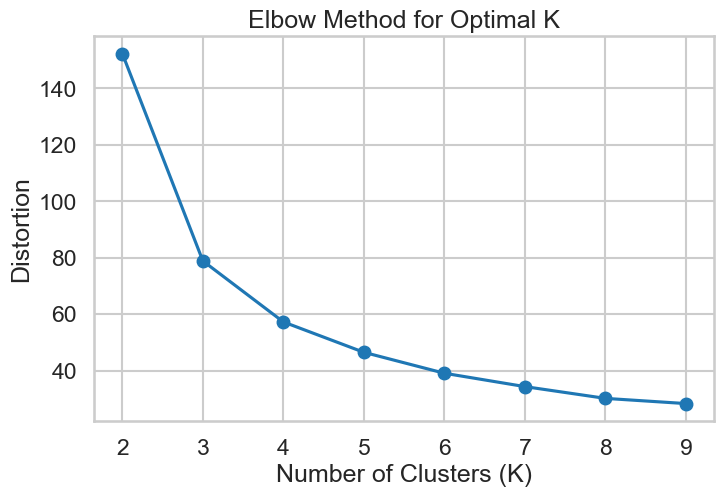

In [32]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, distortions, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K')
plt.show()

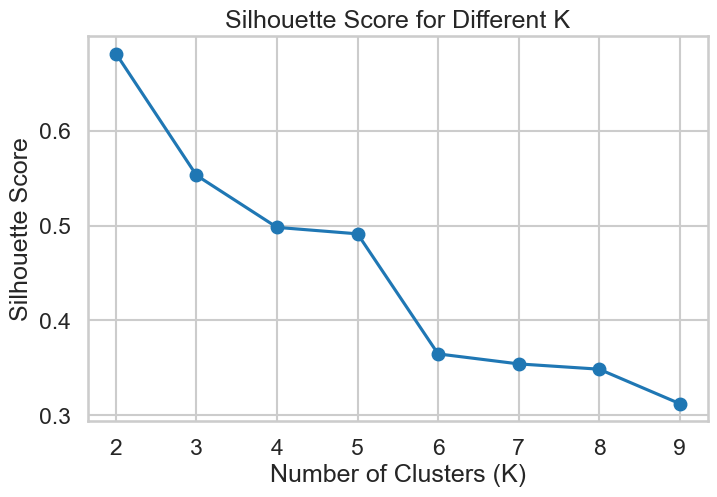

In [33]:
# Plot silhouette score vs K
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K')
plt.show()

In [34]:
print(max(silhouette_scores))

0.6810461692117462


From th elbow method, we can see that the elbow exists at K=3 since the distortions flatten starting there. However, when evaluating the silhouette score graph we see that the highest score is at K=2. Even though the elbow method may suggest that K=3, we can use the silhouette score as a more reliable metric as it guarantees producing tighter and well separated clusters. 
After looking up the dataset online, we can see that the dataset consists of 3 groups, however 2 of them are partially overlapping which is consistent with the results the two graphs generate. 
So the silhouette score prefers K=2 because it avoids this messy overlap, however, the elbow method suggests K=3, which aligns with the real grouping of the dataset.
#### The highest silhouette score is at K=2 followed by k=3 followed by k=4. To be fair it makes sense to choose K=3 as it captures the best of both aspects in this case however at K=3 it is important to note that the silhouette score is not the highest as there are still some clusters overlapping as expalined earlier. However, I believe K=3 provides a fair compromise between the results of both analyses. We may choose K=2 as it is the most conservative approach resulting in more distinct clusters without having any overlap and achieving the highest silhouette score of 0.6810461692117462

## With Scaling

In [37]:
distortions = []
silhouette_scores = []
k_values=range(2, 10)

for k in k_values:
    
    model_kmeans = KMeans(n_clusters=k, init='k-means++',n_init=10, random_state=42) #from documentation the default is already k-means++
    clusters = model_kmeans.fit_predict(scaled_data)
    
    # Calculate distortion (within-cluster sum of squares)
    distortions.append(model_kmeans.inertia_)
    
    # Calculate silhouette score
    score = silhouette_score(scaled_data, clusters)
    silhouette_scores.append(score)

    

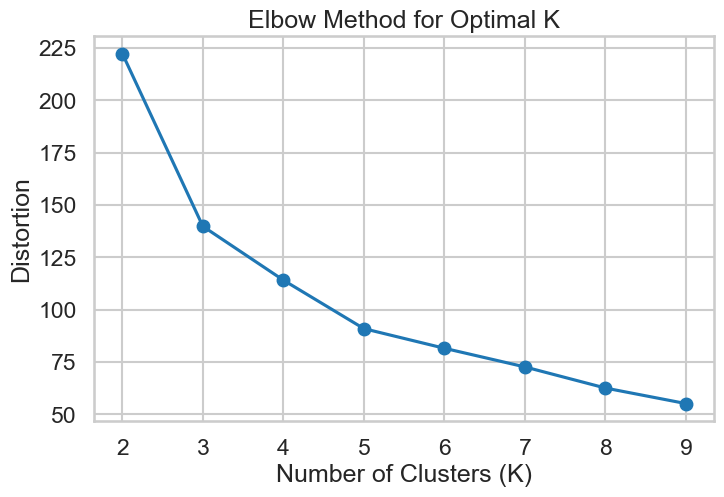

In [38]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, distortions, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K')
plt.show()

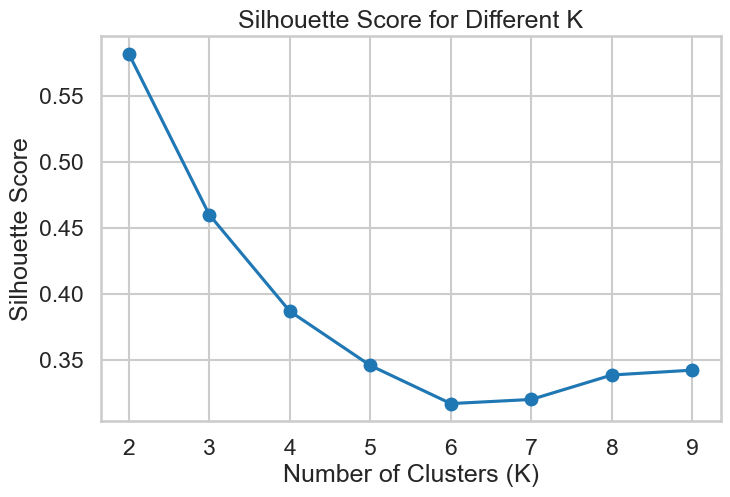

In [39]:
# Plot silhouette score vs K
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K')
plt.show()

In [40]:
print(max(silhouette_scores))

0.5817500491982808


After scaling the data, there is no clear elbow. However, the graph shows that there distortions start to settle around k=4. The highest silhouette score is at K=2 followed by k=3 followed by k=4. To be conservative it makes sense to choose K=3 as it captures the best of both aspects in this case however at K=3 it is important to note that the silhouette score is not the highest as there are still some clusters overlapping as expalined earlier. However, I believe K=3 provides a fair compromise between the results of both analyses

Standard Scaling makes sure that:
1. All features are treated equally.
2. High magnitude features do not have more bias in distance calculations.
   
This shift in feature importance led to different cluster assignments.

However, scaling did not help in improving the algorithm's performance as shown by the decrease in silhouette score from 0.6810461692117462 to  0.5817500491982808.

## Hierarchial Clustering

## Without Scaling

In [45]:
from sklearn.cluster import AgglomerativeClustering

affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['ward', 'complete', 'average', 'single']
distance_thresholds = [2,4,6,8,10]

best_agglomerative_score = -1
best_params = {}

for affinity in affinities:
    for linkage in linkages:
        for threshold in distance_thresholds:
            try:
                model_agg = AgglomerativeClustering(n_clusters=None, metric=affinity, linkage=linkage, distance_threshold=threshold)
                clusters = model_agg.fit_predict(data)
                score = silhouette_score(data, clusters)
                # Count the unique cluster labels
                num_clusters = len(set(clusters) - {-1})
                print(f'Number of clusters formed: {num_clusters}')
                if (score > best_agglomerative_score) and (num_clusters>1):
                    best_agglomerative_score = score
                    best_params = { 'affinity': affinity, 'linkage': linkage, 'threshold': threshold }
            except Exception as e:
                 print(f"Skipping {affinity}, {linkage}, Threshold={threshold} due to error: {e}")


Number of clusters formed: 9
Number of clusters formed: 5
Number of clusters formed: 4
Number of clusters formed: 3
Number of clusters formed: 3
Number of clusters formed: 6
Number of clusters formed: 3
Number of clusters formed: 2
Skipping euclidean, complete, Threshold=8 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipping euclidean, complete, Threshold=10 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Number of clusters formed: 2
Number of clusters formed: 2
Skipping euclidean, average, Threshold=6 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipping euclidean, average, Threshold=8 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipping euclidean, average, Threshold=10 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipping euclidean, single, Threshold=2 due to error: Number of labels is 1.

In [46]:
print(f'Best Agglomerative Clustering Params: {best_params}')
print(f'Best Agglomerative Silhouette Score: {best_agglomerative_score}')

Best Agglomerative Clustering Params: {'affinity': 'euclidean', 'linkage': 'average', 'threshold': 2}
Best Agglomerative Silhouette Score: 0.6867350732769777


In [47]:
clustering = AgglomerativeClustering(
    n_clusters=None,
    metric=best_params['affinity'],  
    linkage=best_params['linkage'],
    distance_threshold=best_params['threshold']
)
clusters = clustering.fit_predict(data)

# Count the unique cluster labels
num_clusters = len(set(clusters) - {-1})

print(f'Number of clusters formed: {num_clusters}')



Number of clusters formed: 2


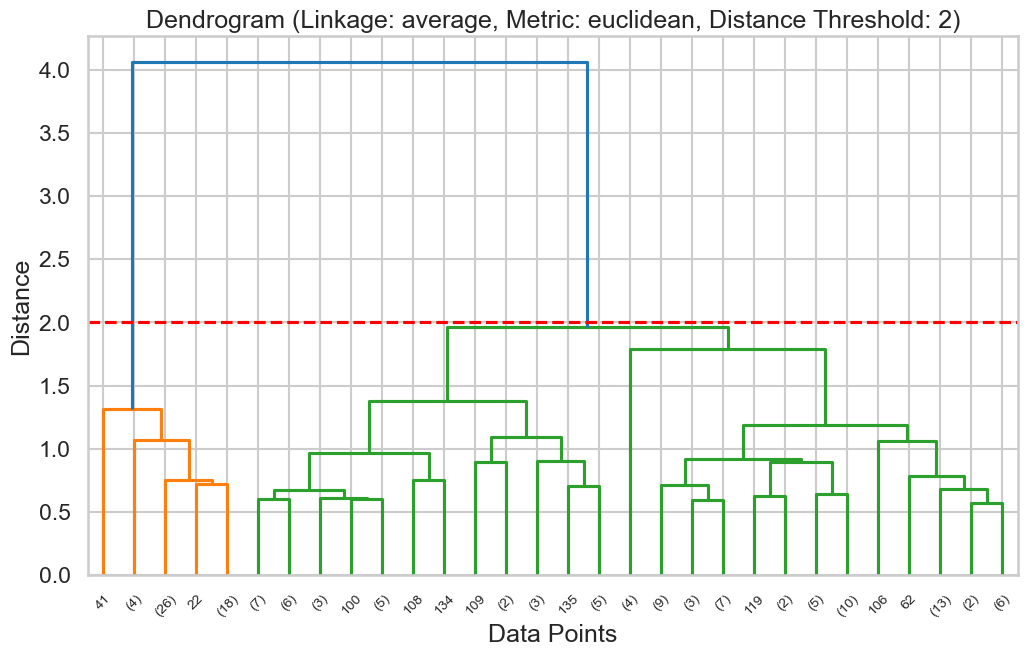

In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Plot dendrogram for the best model
Z = linkage(data, method=best_params['linkage'], metric=best_params['affinity'])

plt.figure(figsize=(12, 7))
plt.title(f"Dendrogram (Linkage: {best_params['linkage']}, Metric: {best_params['affinity']}, Distance Threshold: {best_params['threshold']})")
plt.xlabel("Data Points")
plt.ylabel("Distance")

# Plot dendrogram with color threshold

dendrogram(Z, color_threshold=best_params['threshold'], truncate_mode='lastp')
plt.axhline(y=best_params['threshold'], color='red', linestyle='--')

plt.show()

# Let me know if you want to refine the visualization! 🚀


#### The best Agglomerative Clustering Parameters are {'affinity': 'euclidean', 'linkage': 'average', 'threshold': 2} which produce thet Agglomerativee Silhouette Scor: 0.686735073276977. The high score suggests that these clusters are well-defined

## With Scaling

In [51]:
from sklearn.cluster import AgglomerativeClustering

affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['ward', 'complete', 'average', 'single']
distance_thresholds = [2,4,6,8,10]

best_agglomerative_score = -1
best_params = {}

for affinity in affinities:
    for linkage in linkages:
        for threshold in distance_thresholds:
            try:
                model_agg = AgglomerativeClustering(n_clusters=None, metric=affinity, linkage=linkage, distance_threshold=threshold)
                clusters = model_agg.fit_predict(scaled_data)
                score = silhouette_score(scaled_data, clusters)
                # Count the unique cluster labels
                num_clusters = len(set(clusters) - {-1})
                if (score > best_agglomerative_score) and (num_clusters>1):
                    best_agglomerative_score = score
                    best_params = { 'affinity': affinity, 'linkage': linkage, 'threshold': threshold }
            except Exception as e:
                 print(f"Skipping {affinity}, {linkage}, Threshold={threshold} due to error: {e}")


Skipping euclidean, complete, Threshold=8 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipping euclidean, complete, Threshold=10 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipping euclidean, average, Threshold=4 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipping euclidean, average, Threshold=6 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipping euclidean, average, Threshold=8 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipping euclidean, average, Threshold=10 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipping euclidean, single, Threshold=2 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipping euclidean, single, Threshold=4 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (i

In [52]:
print(f'Best Agglomerative Clustering Params: {best_params}')
print(f'Best Agglomerative Silhouette Score: {best_agglomerative_score}')

Best Agglomerative Clustering Params: {'affinity': 'manhattan', 'linkage': 'average', 'threshold': 4}
Best Agglomerative Silhouette Score: 0.5817500491982808


In [53]:
clustering = AgglomerativeClustering(
    n_clusters=None,
    metric=best_params['affinity'],  
    linkage=best_params['linkage'],
    distance_threshold=best_params['threshold']
)
clusters = clustering.fit_predict(scaled_data)

# Count the unique cluster labels
num_clusters = len(set(clusters) - {-1})

print(f'Number of clusters formed: {num_clusters}')


Number of clusters formed: 2


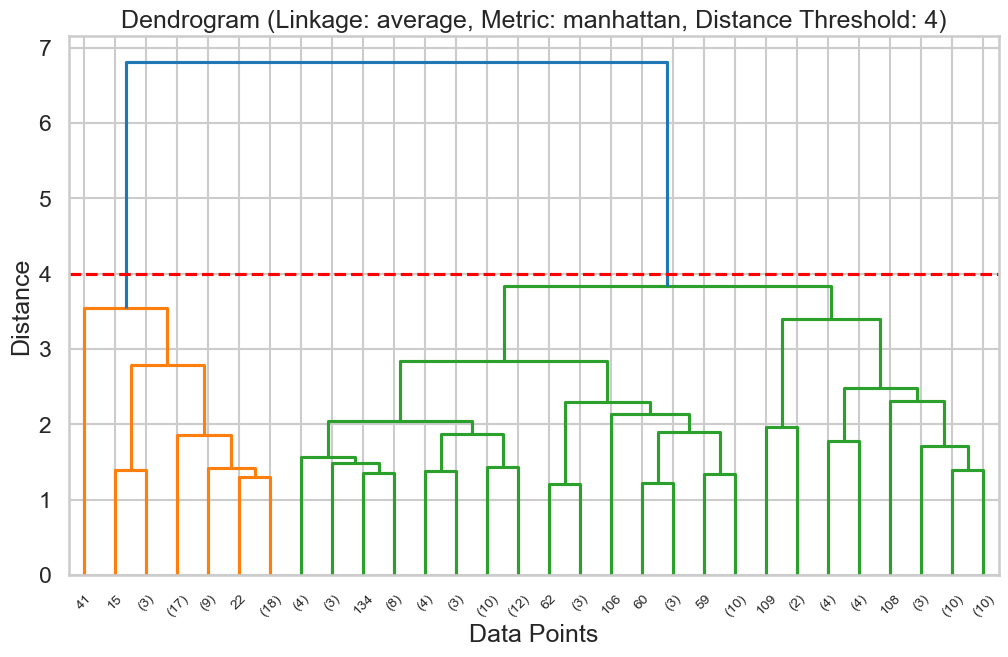

In [54]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

import matplotlib.pyplot as plt

# Plot dendrogram for the best model
dist_matrix = pdist(scaled_data, metric='cityblock')  # 'cityblock' is another name for Manhattan
Z = linkage(dist_matrix, method=best_params['linkage'])
plt.figure(figsize=(12, 7))
plt.title(f"Dendrogram (Linkage: {best_params['linkage']}, Metric: {best_params['affinity']}, Distance Threshold: {best_params['threshold']})")
plt.xlabel("Data Points")
plt.ylabel("Distance")

# Plot dendrogram with color threshold

dendrogram(Z, color_threshold=best_params['threshold'], truncate_mode='lastp')
plt.axhline(y=best_params['threshold'], color='red', linestyle='--')

plt.show()


### Scaling didn't drastically change the clustering this time as we still got 2 clusters. However, the silhouette score slightly decreased meaning that clusters become less defined

## DBSCAN

## Without Scaling

In [58]:
eps_values = np.linspace(0.1, 3, 30)  # Reduce number of steps for clarity
min_samples_values = range(5, 30, 1)  # More range for Min Samples

best_score = -1
best_params = None

# Iterate over eps and min_samples
for eps, min_samples in product(eps_values, min_samples_values):
    model = DBSCAN(eps=eps, min_samples=min_samples)
    labels = model.fit_predict(data)

    # Get number of clusters (excluding noise)
    n_clusters = len(set(labels) - {-1})

    # Ignore cases with only 1 cluster or no clusters
    if n_clusters > 1:
        score = silhouette_score(data, labels)
        
        # Update best score
        if score > best_score:
            best_score = score
            best_params = (eps, min_samples, n_clusters)

In [59]:
print("\nBest Parameters:")
print(f"EPS: {best_params[0]:.3f}, Min Samples: {best_params[1]}, Clusters: {best_params[2]}")
print(f"Best Silhouette Score: {best_score}")


Best Parameters:
EPS: 0.900, Min Samples: 5, Clusters: 2
Best Silhouette Score: 0.6867350732769777


## With Scaling


In [61]:
eps_values = np.linspace(0.1, 3, 30)  # Reduce number of steps for clarity
min_samples_values = range(5, 30, 1)  # More range for Min Samples

best_score = -1
best_params = None

# Iterate over eps and min_samples
for eps, min_samples in product(eps_values, min_samples_values):
    model = DBSCAN(eps=eps, min_samples=min_samples)
    labels = model.fit_predict(scaled_data)

    # Get number of clusters (excluding noise)
    n_clusters = len(set(labels) - {-1})

    # Ignore cases with only 1 cluster or no clusters
    if n_clusters > 1:
        score = silhouette_score(scaled_data, labels)

        # Update best score
        if score > best_score:
            best_score = score
            best_params = (eps, min_samples, n_clusters)

In [62]:
print("\nBest Parameters:")
print(f"EPS: {best_params[0]:.3f}, Min Samples: {best_params[1]}, Clusters: {best_params[2]}")
print(f"Best Silhouette Score: {best_score:.4f}")


Best Parameters:
EPS: 1.400, Min Samples: 5, Clusters: 2
Best Silhouette Score: 0.5818


#### some clusters have overlapping features — there’s no clear density gap to separate them. DBSCAN struggles when clusters touch or slightly overlap, because it can’t draw defined boundaries like K-Means or Hierarchical Clustering.The silhouette score also shifted post-scaling, reflecting a change in clustering quality.

#### Dataset Observations
With reference to the silhouette score, none of the methods found the expected three clusters; instead, they all settled on two. This suggests that the dataset’s structure makes it challenging for clustering algorithms to distinguish betweenthe two overrlapping clusters to form distinct clusters that can achieve the highest silhouette score. 
The three clustering methods produce similar and comparable results and therefore all three can be used with equal confidence. It may make more sense to use K-means for simplicity or Agglomerative clustering for robustness.

Clustering algorithms using silhouette scoring tend to prefer well-separated clusters, so they may merge 2 overlapping clusters into one cluster as in our case, leading to a better silhouette score with K=2 rather than K=3. Silhouette score measures intra-cluster tightness vs inter-cluster separation, so if two species are not perfectly separable, the score naturally favors fewer clusters.

Therefore, we can also use K means since it gives us more information using the elbow method for deciding on whether the optimal number of clusters may be 2 or 3. .

#### Scaling Effect
For the Iris dataset, the natural scale already provides meaningful clusters (especially for petal dimensions), so scaling degrads the intrinsic structure the clustering models rely on.
In the Iris dataset, as found through  online sources, some features (like petal length and petal width) naturally form clearer clusters, while others (like sepal length and width) are more mixed.
Without scaling, clustering models might pick up on the most dominant features, which already split species well.
After scaling, the less informative features contribute equally, introducing noise to the clustering process — which can reduce silhouette scores as observed after evaluating the three models on the scaled data.

## Customer dataset
Repeat all the above on the customer data set 

In [67]:
import pandas as pd
customer_data = pd.read_csv('Customer data.csv')

In [68]:
customer_data.head()

ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1

In [69]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


#### Our data has no missing data so we do not need any imputation. We can drop the ID column as it does not add any info about the customers relevant to clustering and might mess with the models' performance. We need to scale the data in order to prepare the data for distance-based/scale-sensistive models like K-Means.

In [71]:
customer_data = customer_data.drop("ID", axis=1)

In [72]:
customer_data.head()

Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0    0               0   67          2  124670           1                2
1    1               1   22          1  150773           1                2
2    0               0   49          1   89210           0                0
3    0               0   45          1  171565           1                1
4    0               0   53          1  149031           1                1

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_customer_data = scaler.fit_transform(customer_data)

# K-Means

In [75]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score



inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k,n_init=10, random_state=42)
    labels = kmeans.fit_predict(scaled_customer_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_customer_data, labels))



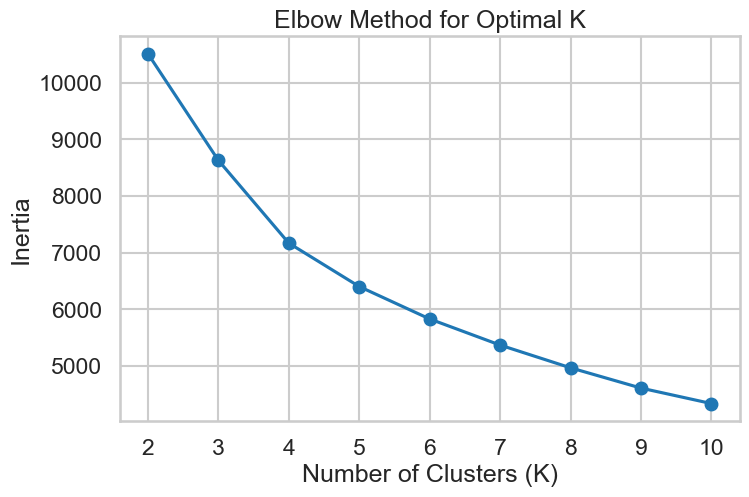

In [76]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

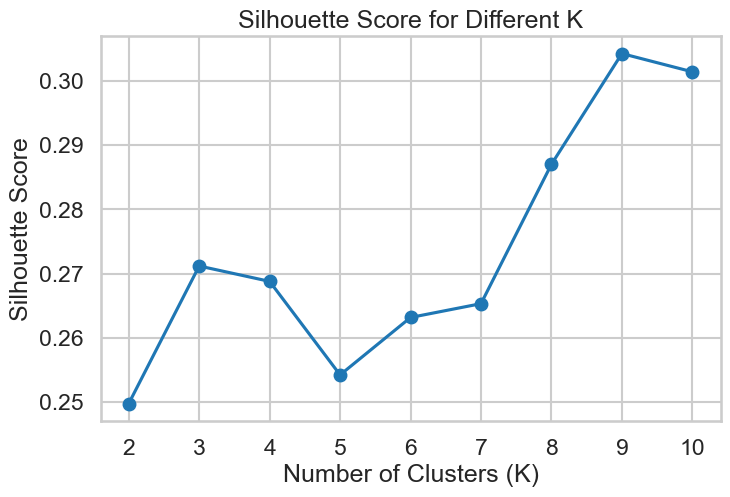

In [77]:
# Plot silhouette score vs K
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K')
plt.show()

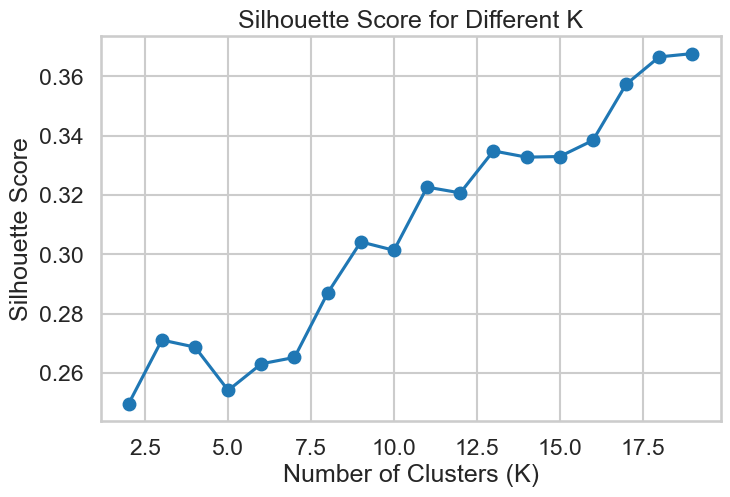

In [78]:
#more investigation on silhouette score
silhouette_scores = []
k_range = range(2, 20)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(scaled_customer_data)
    silhouette_scores.append(silhouette_score(scaled_customer_data, labels))

# Plot silhouette score vs K
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K')
plt.show()


#### We see that the silhouette score keeps increasing as K increases making the results of the analysis not good enough to generate meaningful insights so we attempt min max scaling on the data due to the varying ranges of the data's features. Using min-max scaling ensures that all the ranges are between 0 and 1 making all features have the same effect when attempting to cluster the data

In [80]:
from sklearn.preprocessing import MinMaxScaler

# Initialize Min-Max Scaler
scaler_minmax= MinMaxScaler()

# Fit and transform the dataset
scaled_data_minmax = scaler_minmax.fit_transform(customer_data)

In [81]:
print(scaled_data_minmax)

[[0.         0.         0.84482759 ... 0.32478101 0.5        1.        ]
 [1.         1.         0.06896552 ... 0.42021043 0.5        1.        ]
 [0.         0.         0.53448276 ... 0.19514353 0.         0.        ]
 ...
 [0.         0.         0.22413793 ... 0.18487051 0.         0.        ]
 [1.         1.         0.10344828 ... 0.22716172 0.         0.        ]
 [0.         0.         0.12068966 ... 0.11912317 0.         0.        ]]


In [82]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score



ssd = []
sil_score = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++',n_init=10, random_state=42)
    labels = kmeans.fit_predict(scaled_data_minmax)
    ssd.append(kmeans.inertia_)
    sil_score.append(silhouette_score(scaled_data_minmax, labels))



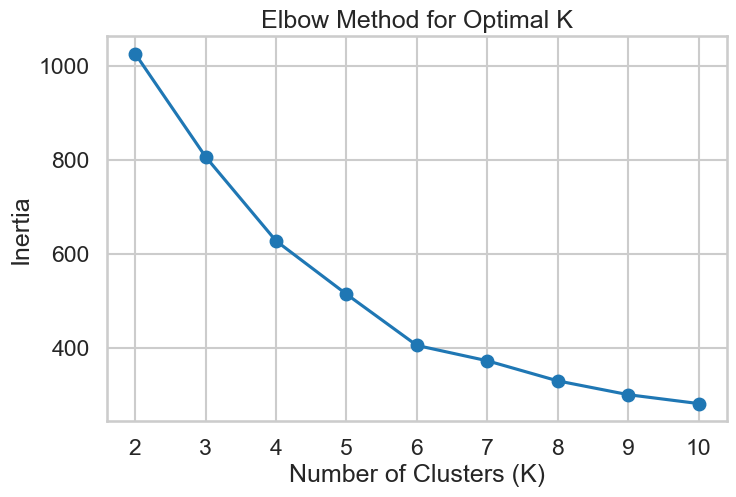

In [83]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, ssd, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

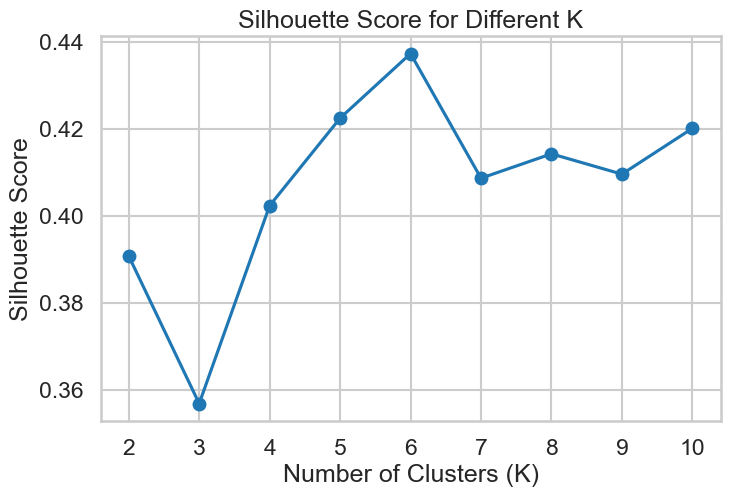

In [84]:
# Plot silhouette score vs K
plt.figure(figsize=(8, 5))
plt.plot(k_range, sil_score, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K')
plt.show()

In [85]:
print(max(sil_score))

0.4373042442245209


#### Elbow is not very clear so we will analyze the silhouette score graph. However, there is a slight elbow at K = 6g the highest silhouette scor leading us to believe that the optimal number of clusters is 6t.

# Hierarchial Clustering

In [88]:
from sklearn.cluster import AgglomerativeClustering

affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['ward', 'complete', 'average', 'single']
distance_thresholds = [8,10,12,14]

best_agglomerative_score = -1
best_params = {}
best_clusters=-1
num_clusters=-1

for affinity in affinities:
    for linkage in linkages:
        for threshold in distance_thresholds:
            try:
                model_agg = AgglomerativeClustering(n_clusters=None, metric=affinity, linkage=linkage, distance_threshold=threshold)
                clusters = model_agg.fit_predict(scaled_data_minmax)
                score = silhouette_score(scaled_data_minmax, clusters)
                # Count the unique cluster labels
                num_clusters = len(set(clusters) - {-1})
                if (score > best_agglomerative_score) and (num_clusters>1):
                    best_agglomerative_score = score
                    best_params = { 'affinity': affinity, 'linkage': linkage, 'threshold': threshold }
                    best_clusters=num_clusters
            except Exception as e:
                 print(f"Skipping {affinity}, {linkage}, Threshold={threshold} due to error: {e}")


Skipping euclidean, complete, Threshold=8 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipping euclidean, complete, Threshold=10 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipping euclidean, complete, Threshold=12 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipping euclidean, complete, Threshold=14 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipping euclidean, average, Threshold=8 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipping euclidean, average, Threshold=10 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipping euclidean, average, Threshold=12 due to error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipping euclidean, average, Threshold=14 due to error: Number of labels is 1. Valid values are 2 to n_sample

In [89]:
print(f'Best Agglomerative Clustering Params: {best_params}')
print(f'Best Agglomerative Silhouette Score: {best_agglomerative_score}')
print(f'Number of clusters formed: {best_clusters}')

Best Agglomerative Clustering Params: {'affinity': 'euclidean', 'linkage': 'ward', 'threshold': 14}
Best Agglomerative Silhouette Score: 0.3993256088563368
Number of clusters formed: 5


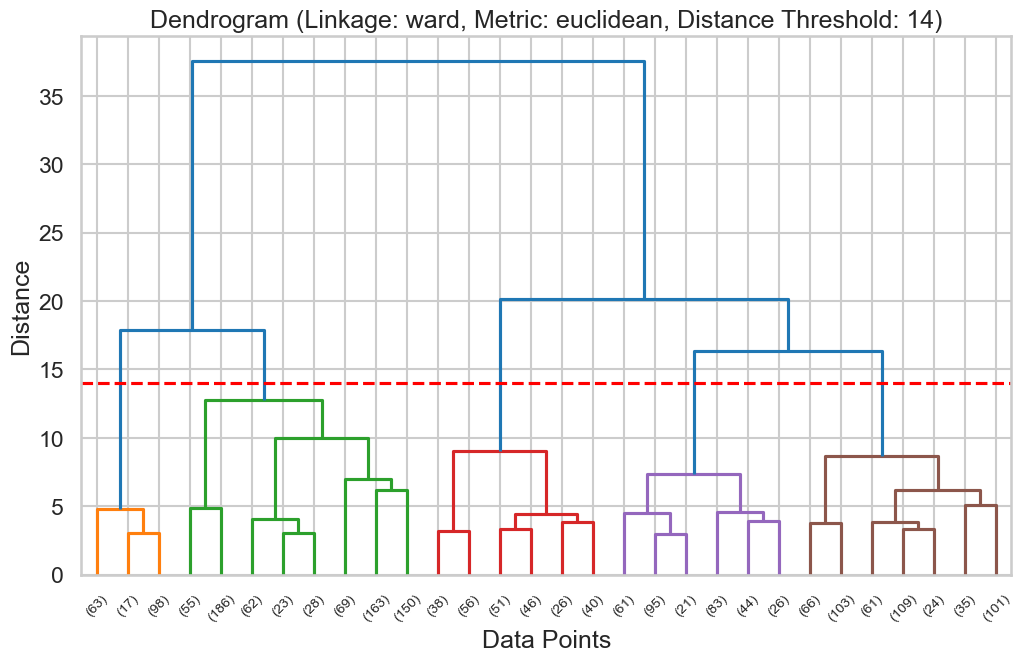

In [90]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Plot dendrogram for the best model
Z = linkage(scaled_data_minmax, method=best_params['linkage'], metric=best_params['affinity'])

plt.figure(figsize=(12, 7))
plt.title(f"Dendrogram (Linkage: {best_params['linkage']}, Metric: {best_params['affinity']}, Distance Threshold: {best_params['threshold']})")
plt.xlabel("Data Points")
plt.ylabel("Distance")

# Plot dendrogram with color threshold

dendrogram(Z, color_threshold=best_params['threshold'], truncate_mode='lastp')
plt.axhline(y=best_params['threshold'], color='red', linestyle='--')

plt.show()



### DBSCAN

In [92]:
eps_values = np.arange(0.5, 2.0, 0.1)  # Try smaller EPS values (0.1 to 2.0)
min_samples_values = np.arange(50, 200, 3)

best_score = -1
best_params = None

# Iterate over eps and min_samples
for eps, min_samples in product(eps_values, min_samples_values):
    model = DBSCAN(eps=eps, min_samples=min_samples)
    labels = model.fit_predict(scaled_data_minmax)

    # Get number of clusters (excluding noise)
    n_clusters = len(set(labels) - {-1})

    # Ignore cases with only 1 cluster or no clusters
    if n_clusters > 1:
        score = silhouette_score(scaled_data_minmax, labels)

        # Update best score
        if score > best_score:
            best_score = score
            best_params = (eps, min_samples, n_clusters)

In [93]:
print("\nBest Parameters:")
print(f"EPS: {best_params[0]:.3f}, Min Samples: {best_params[1]}, Clusters: {best_params[2]}")
print(f"Best Silhouette Score: {best_score:.4f}")


Best Parameters:
EPS: 0.700, Min Samples: 50, Clusters: 4
Best Silhouette Score: 0.4036


#### The best algorithm for this dataset was K-means clustering as it gave the highest silhouette score and it may be interpreted that the clustering is more granular as not only is the score higher but also the number of clusters is higher.